# Lab 17 Exercise 6

## Interface (Remote Control)

1.สร้าง console application project

```cmd
dotnet new console --name Lab17_Ex06
```

2.เปลี่ยน code ให้เป็นดังต่อไปนี้

```cs
Television myTV = new SonyTV();
myTV.Wattage = 100;
myTV.TurnOn();
myTV.ChannelUp();
myTV.ChannelDown();
myTV.TurnOff();

Lamp myLamp = new DesktopLamp();
myLamp.Wattage = 50;
myLamp.TurnOn();
myLamp.ChannelUp();
myLamp.ChannelDown();
myLamp.TurnOff();

interface IRemoteControl
{
    public void TurnOn();
    public void TurnOff();
    public void ChannelUp();
    public void ChannelDown();
}
abstract class PowerAppliance
{
    public bool PowerStatus;
    public int Wattage;
}
class Television : PowerAppliance
{
    public int Channel { get; set; }
}

class Lamp : PowerAppliance
{
}


class SonyTV : Television, IRemoteControl
{
    public void TurnOn() { System.Console.WriteLine("TV Turn on"); PowerStatus = true; }
    public void TurnOff() { System.Console.WriteLine("TV Turn off"); PowerStatus = false; }
    public void ChannelUp() { System.Console.WriteLine("TV Channel up"); }
    public void ChannelDown() { System.Console.WriteLine("TV Channel down"); }
}
class DesktopLamp : Lamp, IRemoteControl
{
    public void TurnOn() { System.Console.WriteLine("Lamp Turn on"); PowerStatus = true; }
    public void TurnOff() { System.Console.WriteLine("Lamp Turn off"); PowerStatus = false; }
    public void ChannelUp() { System.Console.WriteLine("Lamp cannot change channel"); }
    public void ChannelDown() { System.Console.WriteLine("Lamp cannot change channel"); }
}
```

3.Build project โดยการใช้คำสั่ง

```cmd
dotnet build  Lab17_Ex06
```

ถ้ามีที่ผิดพลาดในโปรแกรม ให้แก้ไขให้ถูกต้อง

In [1]:
using System;

interface IRemoteControl
{
    void TurnOn();
    void TurnOff();
    void ChannelUp();
    void ChannelDown();
}

abstract class PowerAppliance
{
    public bool PowerStatus { get; protected set; }
    public int Wattage { get; set; }
}

class Television : PowerAppliance, IRemoteControl
{
    public int Channel { get; set; }

    public void TurnOn()
    {
        Console.WriteLine("TV Turn on");
        PowerStatus = true;
    }

    public void TurnOff()
    {
        Console.WriteLine("TV Turn off");
        PowerStatus = false;
    }

    public void ChannelUp()
    {
        Channel++;
        Console.WriteLine($"TV Channel up to {Channel}");
    }

    public void ChannelDown()
    {
        Channel--;
        Console.WriteLine($"TV Channel down to {Channel}");
    }
}

class Lamp : PowerAppliance, IRemoteControl
{
    // Lamp doesn't support channels, but it inherits PowerAppliance

    public void TurnOn()
    {
        Console.WriteLine("Lamp Turn on");
        PowerStatus = true;
    }

    public void TurnOff()
    {
        Console.WriteLine("Lamp Turn off");
        PowerStatus = false;
    }

    public void ChannelUp()
    {
        Console.WriteLine("Lamp cannot change channel");
    }

    public void ChannelDown()
    {
        Console.WriteLine("Lamp cannot change channel");
    }
}

class SonyTV : Television
{
    // SonyTV doesn't need any change since we already implemented the methods in Television
}

class DesktopLamp : Lamp
{
    // DesktopLamp doesn't need any change since we already implemented the methods in Lamp
}

class Program
{
    static void Main()
    {
        Television myTV = new SonyTV();
        myTV.Wattage = 100;
        myTV.TurnOn();
        myTV.ChannelUp();
        myTV.ChannelDown();
        myTV.TurnOff();

        Lamp myLamp = new DesktopLamp();
        myLamp.Wattage = 50;
        myLamp.TurnOn();
        myLamp.ChannelUp();
        myLamp.ChannelDown();
        myLamp.TurnOff();
    }
}


4.บันทึกผลที่ได้จากการรันคำสั่งในข้อ 3

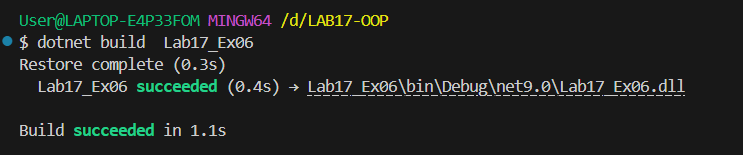

5.Run project โดยการใช้คำสั่ง

```cmd
dotnet run --project Lab17_Ex06
```

6.บันทึกผลที่ได้จากการรันคำสั่งในข้อ 5

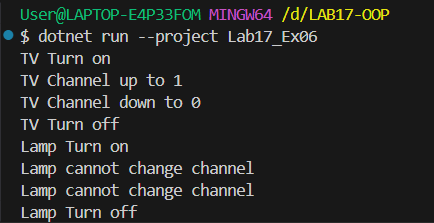

7.อธิบายสิ่งที่พบในการทดลอง

ผลที่ได้คือการที่แต่ละคลาสสามารถควบคุมอุปกรณ์ไฟฟ้าได้ตามฟังก์ชันที่กำหนดใน IRemoteControl แต่มีความแตกต่างในฟังก์ชันที่รองรับ เช่น ทีวีสามารถเปลี่ยนช่องได้ ในขณะที่หลอดไฟไม่สามารถเปลี่ยนช่องได้